<a href="https://colab.research.google.com/github/Balav-Shamra/Google-Data-Analytics-Professional-Certificate/blob/main/Case_Study_1_Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1: Cyclistic-Bike Share Analysis**

###### *Author:* ***Balav Sharma***

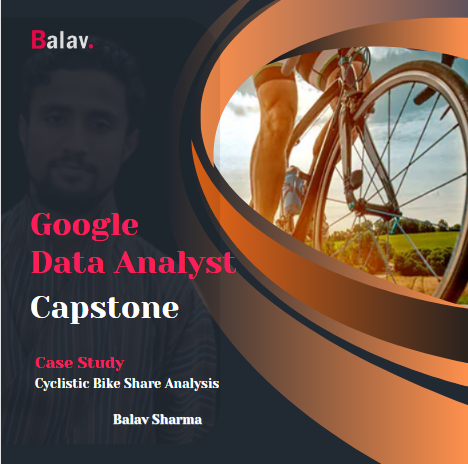

## **I. Introudction**

#### **Background:**
In 2016, Cyclistic launched its bike-share offering in Chicago, quickly expanding to become a prominent player in the city's transportation landscape. With a fleet of over 5,800 bicycles and 600 docking stations, Cyclistic prides itself on its inclusive approach, offering a diverse range of bikes to cater to various riders, including those with disabilities. As the program grew, so did the need for strategic marketing initiatives to sustain and enhance Cyclistic's market position.

#### **Project Scenario:**
As a junior data analyst on Cyclistic's marketing team, I'm tasked with addressing a critical business challenge: **maximizing annual memberships.** The director of marketing, Lily Moreno, believes that increasing the number of annual members is crucial for Cyclistic's future success. To achieve this goal, my team aims to gain a deep understanding of how casual riders and annual members utilize Cyclistic bikes differently. By analyzing historical trip data, the **objective is to identify insights that will inform the development of a targeted marketing strategy to convert casual riders into annual members.**

#### **Characters and Teams:**
*  **Cyclistic:** Operates a bike-share program with 5,800+ bicycles and 600 docking stations, offering various bike options including reclining, hand tricycles, and cargo bikes to enhance inclusivity. Majority opt for traditional bikes, while 8% use assistive options. Users primarily ride for leisure, but 30% commute daily.

*  **Lily Moreno:** Director of marketing responsible for developing campaigns and initiatives, utilizing channels like email and social media to promote the bike-share program.

*  **Cyclistic Marketing Analytics Team:** Data analysts responsible for collecting, analyzing, and reporting data to guide Cyclistic's marketing strategy. I, a junior data analyst, recently joined this team and are learning about Cyclistic’s mission and business goals.

*  **Cyclistic Executive Team:** Detail-oriented executives tasked with approving the recommended marketing program, ensuring alignment with Cyclistic's goals.

------
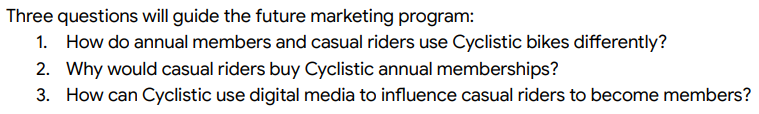

------

## **II. Phase 1 - ASK**

#### **Problem Statement:**
*  The primary problem revolves around maximizing annual memberships at
   Cyclistic, which is believed to be crucial for the company's future success.
*  Specifically, the team aims to understand the differences in bike usage
   patterns between casual riders and annual members to design a targeted marketing strategy for conversion.

#### **Analysis Approach:**
*  The analysis will involve examining Cyclistic's historical bike trip data to
   identify trends and patterns in usage between casual riders and annual members.
*  Data-driven insights will be essential for creating compelling marketing
   recommendations backed by evidence.

#### **Stakeholders:**
*  Lily Moreno: Director of Marketing, responsible for approving marketing
   strategies.
*  Cyclistic Marketing Analytics Team: Data analysts involved in data  collection and analysis.
*  Cyclistic Executive Team: Decision-makers who will evaluate and approve the
   recommended marketing program.

#### **Business/Key Question:**
*  **How do annual members and casual riders use Cyclistic bikes differently ?**

#### **Project Objective:**
*  Design marketing strategies aimed at converting casual riders into
   annual members.

## **III. Phase 2 - PREPARE**

#### **Data Sources:**

*  To answer this question, I will utilize data from the previous 12 months
  (between April 2022 to March 2023) of Cyclistic's historical trip data.
*  The data, although fictional for Cyclistic, is sourced from a real company
   provided by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).
*  You can access the dataset from [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

#### **Data Organization:**

*  The data comprises CSV files containing details such as trip  
   duration, start and end times, user types (casual rider or annual member), and other relevant attributes.

##### **I) Download the Cyclistic's historical trip data and merge all files into a Dataframe**

In [8]:
# Import required libraries
library('readr')
library('readxl')
library('tidyverse')
library('ggplot2')
library('stringr')
library('scales')
library("dplyr")
library("purrr")
library("zip")

# install the import library not already installed on the system
install.packages("patchwork")
library("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# Define a function to merge CSV and Excel files from zip archives
merge_csv_from_zip <- function(zip_paths) {
  # Create an empty list to store data frames
  data_frames <- list()

  # Loop through each zip file path
  for (zip_path in zip_paths) {
    # Unzip the file
    unzip(zip_path)

    # Get the list of files inside the zip
    files <- list.files(pattern = "\\.csv$|\\.xls$", full.names = TRUE)

    # Read each file and append it to the list
    for (file in files) {
      # Check file extension and read accordingly
      if (grepl("\\.csv$", file)) {
        data <- read.csv(file)  # Read CSV file
      } else if (grepl("\\.xls$", file)) {
        data <- readxl::read_excel(file)  # Read Excel file
      }
      data_frames <- append(data_frames, list(data))  # Append data frame to the list
    }

    # Remove the extracted files
    file.remove(files)
  }

  # Combine all data frames into one
  combined_df <- do.call(rbind, data_frames)

  return(combined_df)  # Return the combined data frame
}

# Array of zip files path
zip_paths <- c("/content/202203-divvy-tripdata.zip", "/content/202204-divvy-tripdata.zip","/content/202205-divvy-tripdata.zip",
              "/content/202206-divvy-tripdata.zip", "/content/202207-divvy-tripdata.zip", "/content/202208-divvy-tripdata.zip",
              "/content/202209-divvy-tripdata.zip", "/content/202210-divvy-tripdata.zip", "/content/202211-divvy-tripdata.zip",
              "/content/202212-divvy-tripdata.zip", "/content/202301-divvy-tripdata.zip", "/content/202302-divvy-tripdata.zip")

# Call the function to merge data
df <- merge_csv_from_zip(zip_paths)

In [11]:
# display the first few rows of the dataframe
head(df)

# Print the number of rows
cat("Number of rows:", nrow(df), "\n")

# Print the number of columns
cat("Number of columns:", ncol(df), "\n")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.88688,-87.62603,41.88918,-87.63851,member
2,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.90100,-87.62375,41.89820,-87.63754,member
3,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.97835,-87.65975,41.98404,-87.66027,member
4,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.88688,-87.62603,41.87771,-87.63532,member
5,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.91172,-87.62680,41.87794,-87.66201,member
6,9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.91802,-87.65218,41.92077,-87.66371,member


Number of rows: 5829084 
Number of columns: 13 


##### **2) Data Summary and Column Descriptions**

***Merged 12 files into a dataframe which includes 13 variables/columns and 5,829,084 observations/rows...***

*  **ride_id:** id of each trip
*  **rideable_type:** type of bike
* **started_at:** the time the trip started
*  **ended_at:** the time the trip ended
*  **start_station_name:** the name of the bike station at which the   trip started
*  **start_station_id:** id of the station at which the trip started
*  **end_station_name:** the name of the bike station at which the trip
     ended
*  **end_station_id:** id of the station at which the trip ended
*  **start_lat:** latitude of the station at which the trip started
*  **start_lng:** longitude of the station at which the trip started
*  **end_lat:** latitude of the station at which the trip ended
*  **end_lng:** longitude of the station at which the trip ended
*  **member_casual:** type of user who completed the trip

## **IV. Phase 3 - PROCESS**

##### **1) Key Tasks Involved to Pre-process the data to make it ready for Analyze Stage:**

1. **Assess Data Quality:**

*  **Correct Values (Accuracy):** Ensure the data accurately represents the real-world values it is supposed to reflect.

*  **Completeness:** Evaluate whether all necessary data fields are populated with values.

*  **Consistency:** Check for any contradictions or inconsistencies within the data.

*  **Currency:** Verify that the data is up-to-date and relevant for the analysis.

*  **Relevancy:** Assess the metadata associated with the data to ensure its relevance to the analysis goals.

*  **Validity:** Ensure that the data contains only allowable values and adheres to defined standards.

*  **Uniqueness:** Identify and handle any duplicate records within the dataset.

2. **Clean the Data:**

*  **Select Needed Columns:** Choose the relevant columns required to answer the analysis questions.

*  **Fix Data Issues:** Address any identified issues such as missing values, incorrect values, or inconsistencies.

**--> Add the columns[`ride_length`, `day_of_week` & `month`] in the DataFrame to derive meaningful information**

In [13]:
# Create ride_length and day_of_week columns

# Ensure 'started_at' is in date-time format
df$started_at <- as.POSIXct(df$started_at)

# Calculate the ride length in minutes and round the result to two decimal places
df = df %>% mutate(ride_length_mins = round(difftime(ended_at, started_at, units='mins'), 2),

                       # Extract the hour from the 'started_at' timestamp and store it in the 'time' column
                       time = format(as.POSIXct(started_at), format = "%H"),

                       # Extract the day of the week  and month from the 'started_at' timestamp and store it in the 'day_of_week' column
                       day_of_week = weekdays(df$started_at), month = months(df$started_at))

# Extract the numerical value from the 'ride_length_mins' column by splitting the string at the space character
df$ride_length_mins = as.double(str_split_fixed(df$ride_length_mins, ' ', 1))

**--> Access the Data Quality**

In [14]:
# Display concise overview of dataframe structure
glimpse(df)

Rows: 5,829,084
Columns: 17
$ ride_id            <chr> "47EC0A7F82E65D52", "8494861979B0F477", "EFE527AF80…
$ rideable_type      <chr> "classic_bike", "electric_bike", "classic_bike", "c…
$ started_at         <dttm> 2022-03-21 13:45:01, 2022-03-16 09:37:16, 2022-03-…
$ ended_at           <chr> "2022-03-21 13:51:18", "2022-03-16 09:43:34", "2022…
$ start_station_name <chr> "Wabash Ave & Wacker Pl", "Michigan Ave & Oak St", …
$ start_station_id   <chr> "TA1307000131", "13042", "13109", "TA1307000131", "…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Orleans St & Chestnut …
$ end_station_id     <chr> "KA1503000043", "620", "15578", "TA1305000025", "13…
$ start_lat          <dbl> 41.88688, 41.90100, 41.97835, 41.88688, 41.91172, 4…
$ start_lng          <dbl> -87.62603, -87.62375, -87.65975, -87.62603, -87.626…
$ end_lat            <dbl> 41.88918, 41.89820, 41.98404, 41.87771, 41.87794, 4…
$ end_lng            <dbl> -87.63851, -87.63754, -87.66027, -87.63532, -87.662…
$ member_cas

In [15]:
# Conducting summary statistics/data distribution to assess accuracy and validity of data
summary(df)

   ride_id          rideable_type        started_at                    
 Length:5829084     Length:5829084     Min.   :2022-03-01 00:00:19.00  
 Class :character   Class :character   1st Qu.:2022-06-08 07:55:40.00  
 Mode  :character   Mode  :character   Median :2022-08-02 12:43:52.50  
                                       Mean   :2022-08-08 08:42:54.79  
                                       3rd Qu.:2022-10-01 06:46:10.75  
                                       Max.   :2023-02-28 23:59:31.00  
                                                                       
   ended_at         start_station_name start_station_id   end_station_name  
 Length:5829084     Length:5829084     Length:5829084     Length:5829084    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

In [16]:
# Check consistency of values in specified columns by showing counts of each unique values
for (col in c('rideable_type', 'member_casual')){
    cat("Column:", col, "\n")
    print(table(df[[col]]))
    cat("\n")
}

Column: rideable_type 

 classic_bike   docked_bike electric_bike 
      2666915        179085       2983084 

Column: member_casual 

 casual  member 
2365120 3463964 



In [17]:
# Completeness checking:
# Calculate and display the number of missing values for each column
cat("Missing Values in each column:", "\n \n")
missing_values <- lapply(names(df), function(col) paste(col, ":", sum(is.na(df[[col]]))))
cat(paste(missing_values, collapse = "\n"), "\n")

Missing Values in each column: 
 
ride_id : 0
rideable_type : 0
started_at : 0
ended_at : 0
start_station_name : 0
start_station_id : 0
end_station_name : 0
end_station_id : 0
start_lat : 0
start_lng : 0
end_lat : 5938
end_lng : 5938
member_casual : 0
ride_length_mins : 0
time : 0
day_of_week : 0
month : 0 


In [18]:
# Uniqueness checking:
# Display the number of duplicates using Primay Column(ride_id)
cat('Number of duplicates in the data:', sum(duplicated(df$ride_id)))

Number of duplicates in the data: 0

`No duplicate values/entries are found. While other values may repeat, ride IDs in the database must be unique. Therefore, I specifically checked for duplicates using the ride ID column.`

**--> Setting the Visualization graphs size and color palettes for graphical elements**

In [19]:
# Adjust the size of plots in the notebook
options(repr.plot.width = 16, repr.plot.height = 8)

# Define theme for all graphs
theme <- theme(
  plot.title = element_text(size = 25, face = 'bold', hjust = .5),
  plot.subtitle = element_text(size = 20),
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 20),
  legend.text = element_text(size = 20),
  legend.title = element_text(size = 20)
)

# Define theme specifically for pie charts
pie_theme <- theme_classic() + theme(
  axis.line = element_blank(),
  axis.text = element_blank(),
  axis.title = element_blank(),
  axis.ticks = element_blank(),
  plot.title = element_text(size = 25, face = 'bold', hjust = 0.5),
  legend.title = element_text(size = 25),
  legend.text = element_text(size = 20)
)

# Function to get the colors of the graph
colors <- function(red, yellow, green, blue) {
  colors <- c(rep('#DB4437', red), rep('#F4B400', yellow), rep('#0F9D58', green), rep('#4285F4', blue))
  return(colors)
}

**--> Displaying the Missing Values Distribution corresponding to each months**

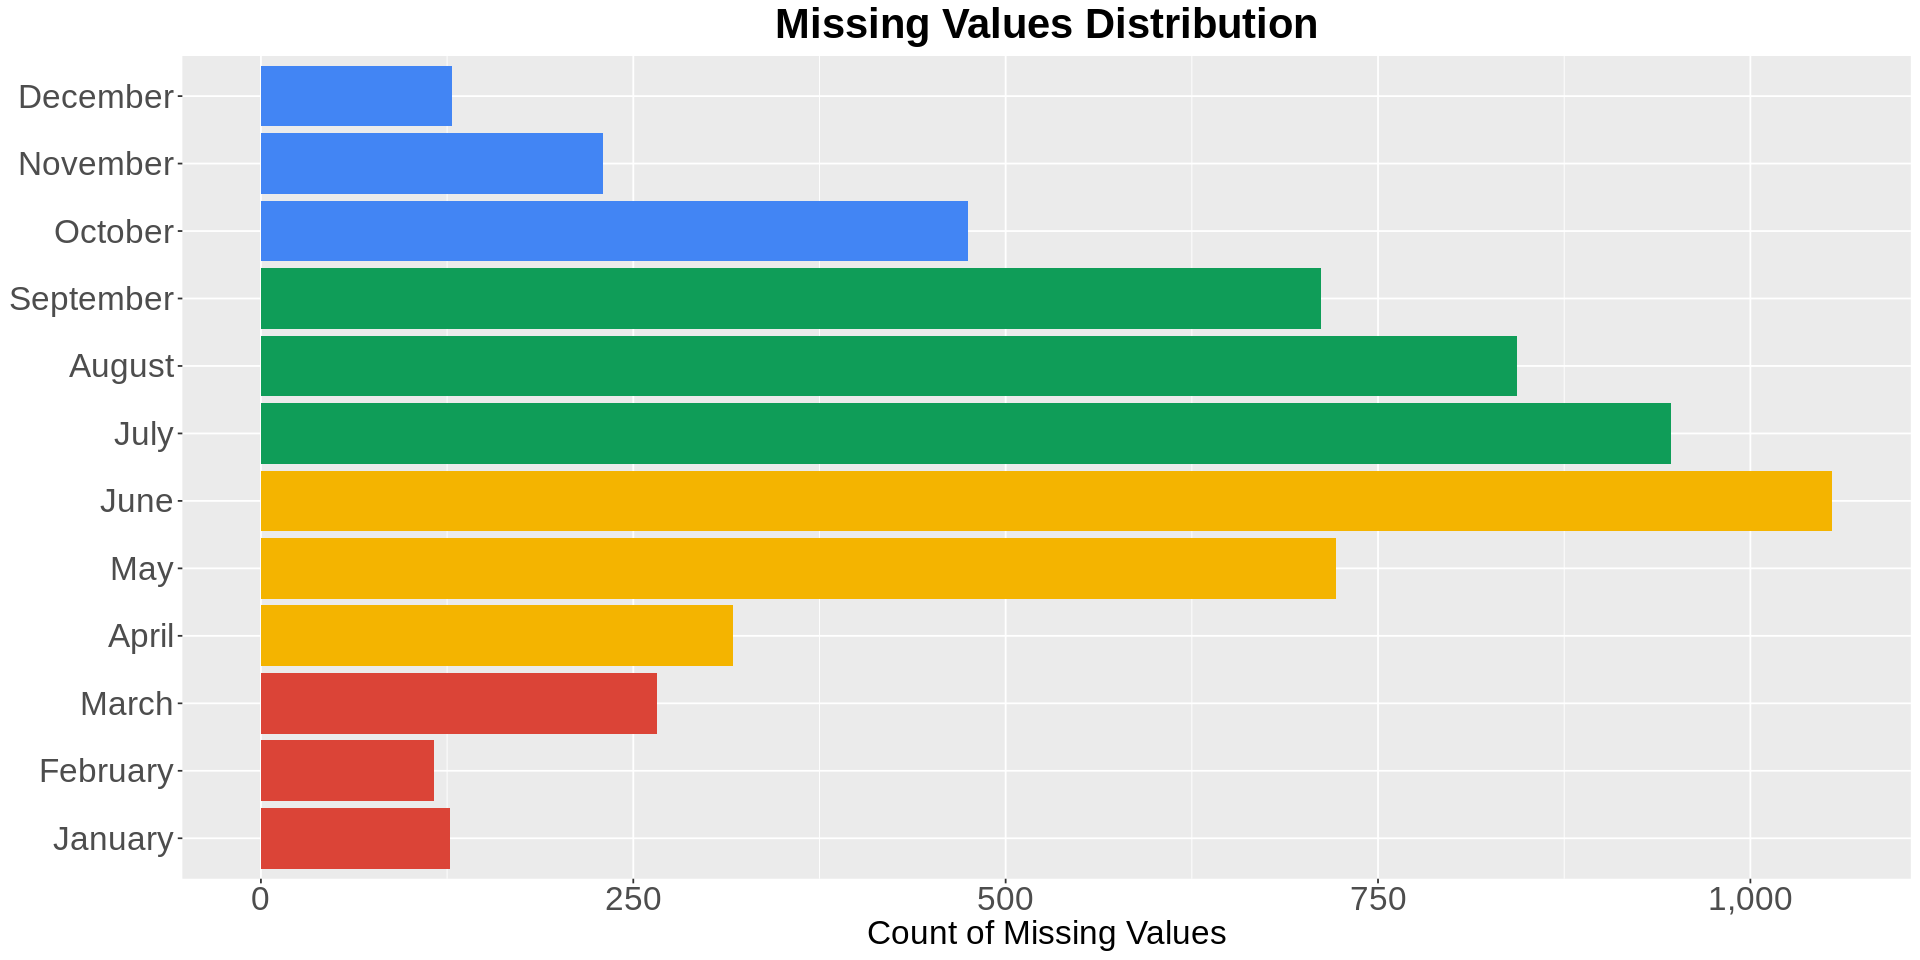

In [20]:
# Order the months
df$month <- factor(df$month,
                     levels = c('January', 'February', 'March', 'April', 'May', 'June','July',
                                'August', 'September', 'October', 'November', 'December'))

# Get the rows with missing values in start_station_name and end_station_name
temp <- filter(df[c('end_lat', 'end_lng', 'month')],
               is.na(df$end_lat) | is.na(df$end_lng)) %>%
        group_by(month) %>%
        summarise(count = n())

# Bar Chart
ggplot(temp, aes(y = month, x = count)) +
  geom_col(fill = colors(3, 3, 3, 3)) +
  theme +
  theme(axis.title.y = element_blank()) +
  ggtitle('Missing Values Distribution') +
  scale_x_continuous(name = "Count of Missing Values", labels = comma)

In [21]:
# Selecting needed columns for addressing the question
# Removing columns that are not required for analysis, such as ride ID, start station ID, end station ID, start time, and end time.
df_filtered <- subset(df, select = -c(ride_id, start_station_id, end_station_id, started_at, ended_at, end_lat, end_lng))

In [22]:
# Removing all missing values/rows having missing values from the data, if any
df_filtered <- na.omit(df_filtered)

**--> Checking and fixing any inconsistent/meaningless values in a column**

In [23]:
# Count negative values in each numeric columns

# Select numeric columns
numeric_cols <- df_filtered[, sapply(df_filtered, is.numeric)]

# Count negative values in each numeric column
negative_counts <- colSums(numeric_cols < 0, na.rm = TRUE)

# Print column names with counts of negative values
cat("COUNT OF NEGATIVE VALUES IN EACH NUMERIC COLUMNS \n \n")
for (i in seq_along(negative_counts)) {
  cat(names(negative_counts)[i], "--> ", negative_counts[i], "\n")
}

COUNT OF NEGATIVE VALUES IN EACH NUMERIC COLUMNS 
 
start_lat -->  0 
start_lng -->  5829084 
ride_length_mins -->  101 


`Noticing negative ride lengths, I had to choose between removal or considering a time mix-up. Subtracting start time from end time led to negative durations. To fix this, I took the absolute value of the  ` ride_length_mins ` variable to ensure positive, logical durations.`

In [24]:
# Replace negative ride lengths with positive values, taking absolute value of 'ride_length_mins' variable
df_filtered$ride_length_mins <- abs(df_filtered$ride_length_mins)

In [25]:
# Completeness checking:
# Rechecking the number of missing values for each column
cat("Missing Values in each column:", "\n \n")
missing_values <- lapply(names(df_filtered), function(col) paste(col, ":", sum(is.na(df_filtered[[col]]))))
cat(paste(missing_values, collapse = "\n"), "\n")

Missing Values in each column: 
 
rideable_type : 0
start_station_name : 0
end_station_name : 0
start_lat : 0
start_lng : 0
member_casual : 0
ride_length_mins : 0
time : 0
day_of_week : 0
month : 0 


In [26]:
# Displaying the cleaned data
head(df_filtered)

,rideable_type,start_station_name,end_station_name,start_lat,start_lng,member_casual,ride_length_mins,time,day_of_week,month
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>
1,classic_bike,Wabash Ave & Wacker Pl,Kingsbury St & Kinzie St,41.88688,-87.62603,member,6.28,13,Monday,March
2,electric_bike,Michigan Ave & Oak St,Orleans St & Chestnut St (NEXT Apts),41.90100,-87.62375,member,6.30,09,Wednesday,March
3,classic_bike,Broadway & Berwyn Ave,Broadway & Ridge Ave,41.97835,-87.65975,member,2.77,19,Wednesday,March
4,classic_bike,Wabash Ave & Wacker Pl,Franklin St & Jackson Blvd,41.88688,-87.62603,member,9.80,19,Tuesday,March
5,classic_bike,DuSable Lake Shore Dr & North Blvd,Loomis St & Jackson Blvd,41.91172,-87.62680,member,42.17,18,Monday,March
6,classic_bike,Bissell St & Armitage Ave,Southport Ave & Clybourn Ave,41.91802,-87.65218,member,4.70,17,Monday,March


**--> Save the Cleaned DataFrame**

In [ ]:
# Save the cleaned dataframe to a CSV file
write.csv(df_filtered, file = "/content/cleaned_df.csv", row.names = FALSE)

##### **Data Pre-process Stage Summary:**

- There were over 5K rows with missing values related to `end_lat` & `end_lng` columns.
- There were negative values in `ride_length_mins` column which is meaningless/inconsistent.
- Filterd the dataframe to include only the requrired columns for analysis.
- Removed any missing values from the filtered DataFrame.
- Replaced all negetive values in the `ride_length_mins` variable to positive to make it meaningful.
- Saved the cleaned DataFrame to reuse it in the future.

# **~ ~ ~ ~ ~ ~ DATA IS PREPARED FOR ANALYSIS ~ ~ ~ ~ ~ ~**

## **V. Phase 4 - ANALYZE**

`
Upon completing the data preparation and processing phase, I delved into an analysis of the two distinct user groups: annual members and casual riders of Cyclistic bikes. The aim is to gain insights into their differing usage patterns.`

##### **Key Task Involved into Data Analysis**

1. Determine the percentage of total trips made by each user group.

2. Identify the preferred types of bikes among the two groups.

3. Analyze the variation in demand across weekdays to pinpoint high and low usage periods.

4. Identify the most frequently used start and end stations by both user groups.

5. Conduct a five-number summary analysis of ride lengths to understand their distribution.

6. Examine the fluctuation in demand across different months to identify peak and off-peak periods.

7. Analyze the variation in demand throughout the day to identify peak and off-peak hours.

In [ ]:
# Read/Import CSV file into the DataFrame
df_filtered = read.csv("/content/cleaned_df_shorts.csv")

##### **1) Determine the Percentage of total trips made by each user group**

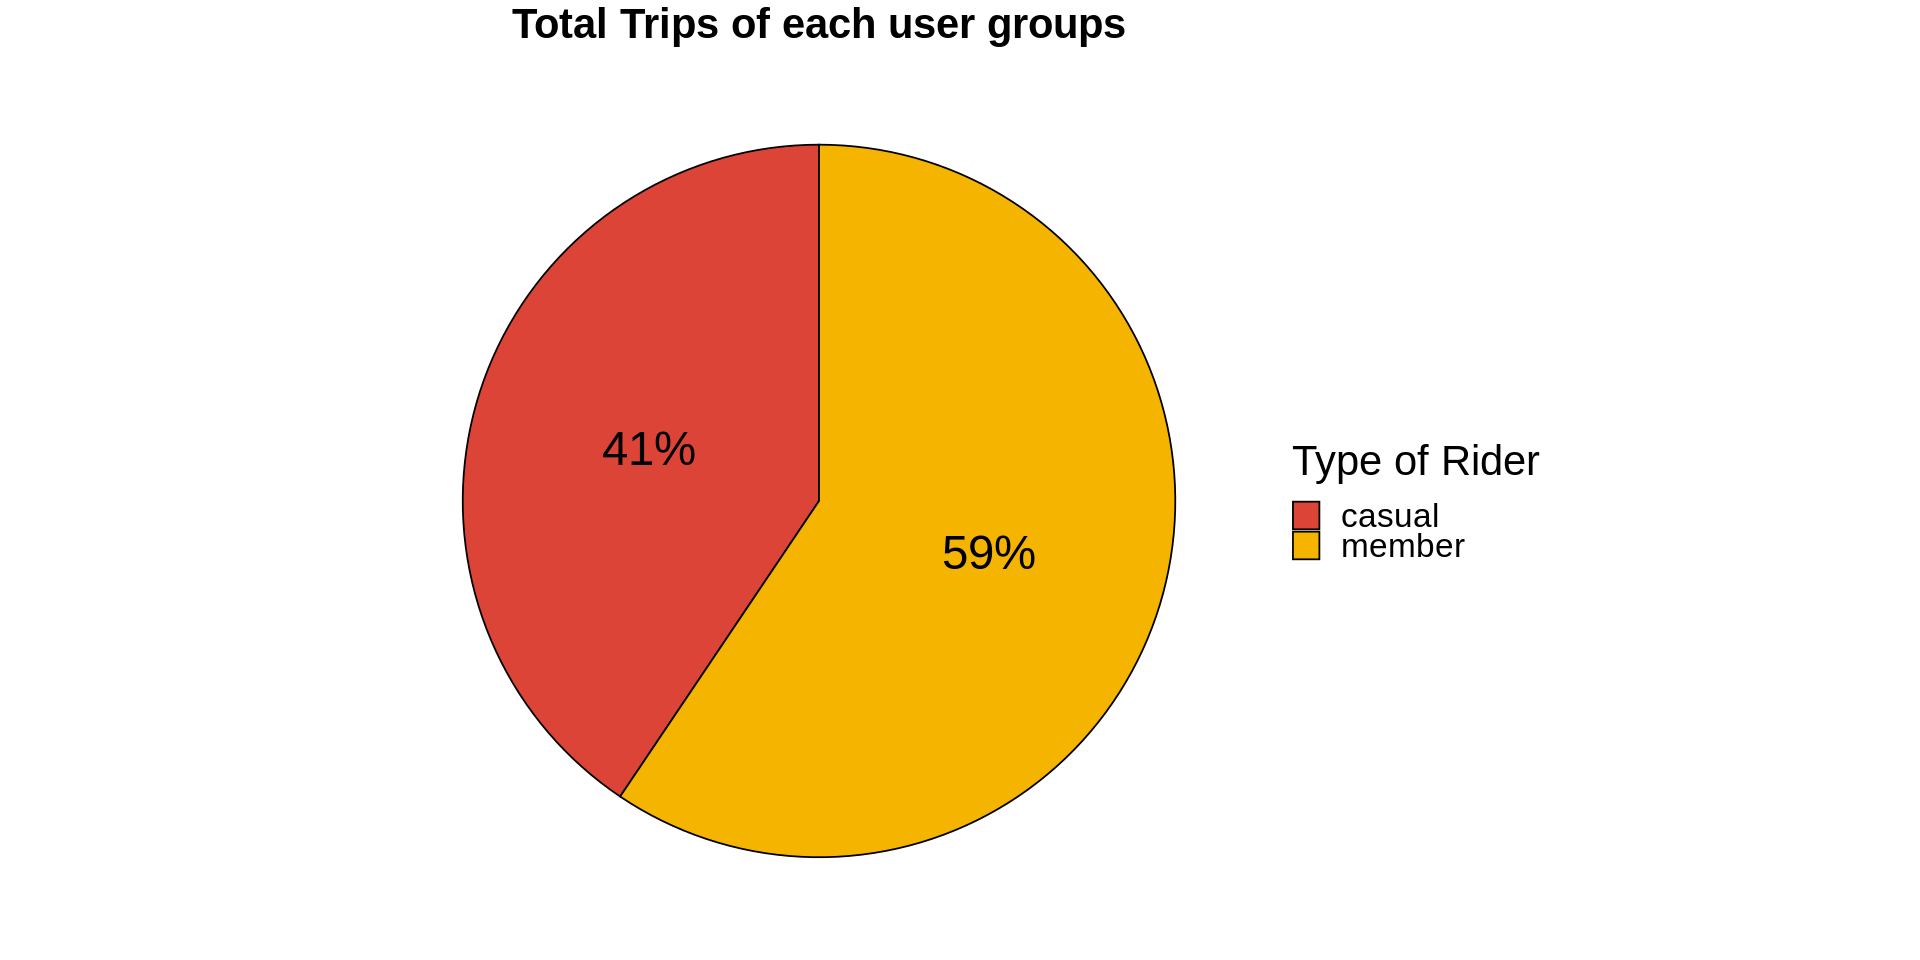

In [27]:
# Pie Chart to display the trips percent of each user group

# Calculate the count of trips for each user group
temp <- df_filtered %>%
  group_by(member_casual) %>%
  summarise(count = n())

# Calculate percentages and add to the plot
percentiles <- geom_text(aes(label = paste0(round(count * 100 / sum(count), 0), "%")), size = 10, position = position_stack(vjust = 0.5))

# Plotting the pie chart
ggplot(temp, aes(x = '', y = count, fill = member_casual)) +
  geom_bar(stat = "identity", width = 1, color = 'black') +
  coord_polar("y", start = 0) +
  percentiles +
  pie_theme +  # Assuming pie_theme is a predefined theme
  scale_fill_manual("Type of Rider", values = colors(1, 1, 0, 0)) +  # Assuming colors is a predefined function
  labs(title = "Total Trips of each user groups")

##### **2) Identify the preferred types of bikes among the two groups.**

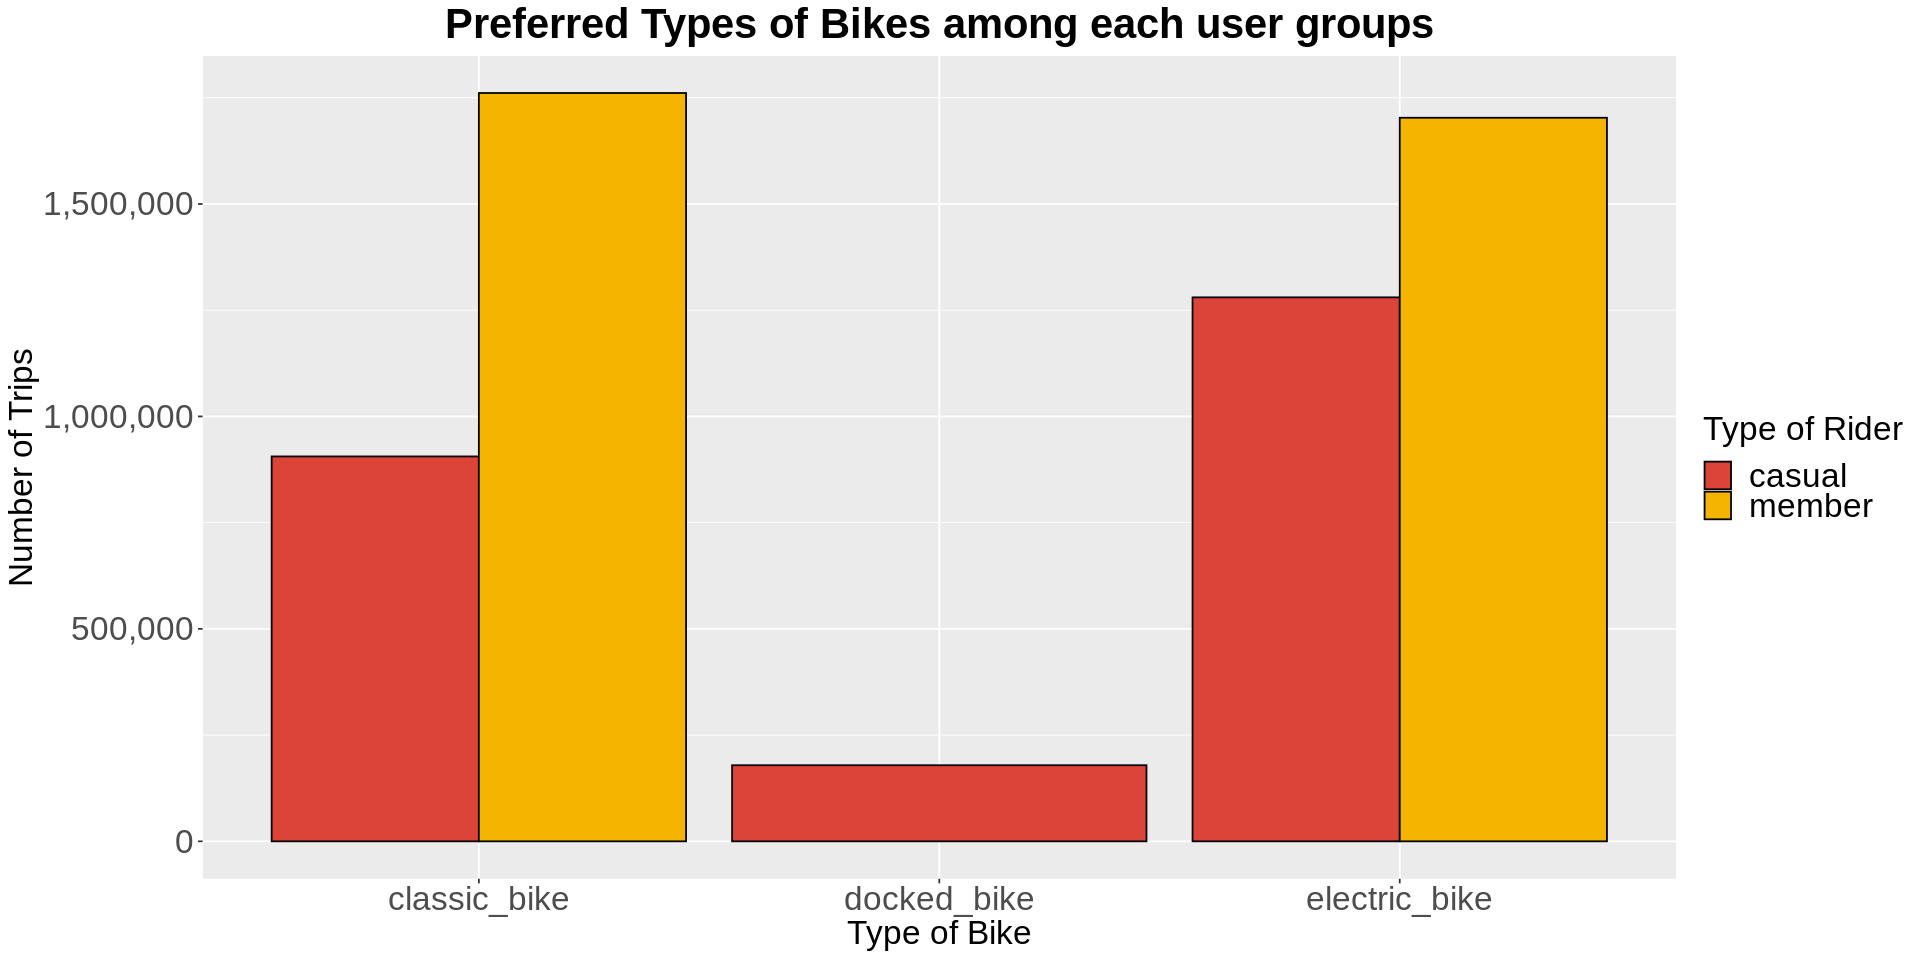

In [28]:
# Column Chart to display preferred types of bikes among each user groups

# Calculate the count of trips for each combination of user group and rideable type
temp <- df_filtered %>%
  group_by(member_casual, rideable_type) %>%
  summarise(.groups = 'drop', count = n())

# Plotting the column chart
ggplot(temp, aes(fill = member_casual, x = rideable_type, y = count)) +
  geom_col(position = 'dodge', color = 'black') +
  scale_fill_manual("Type of Rider", values = colors(1, 1, 0, 0)) +  # Assuming colors is a predefined function
  theme +  # Assuming theme is a predefined theme
  ggtitle('Preferred Types of Bikes among each user groups') +
  xlab('Type of Bike') +
  scale_y_continuous(name = 'Number of Trips', labels = comma)  # Assuming comma is a predefined function


##### **3) Analyze the variation in demand across weekdays to pinpoint high and low usage periods.**

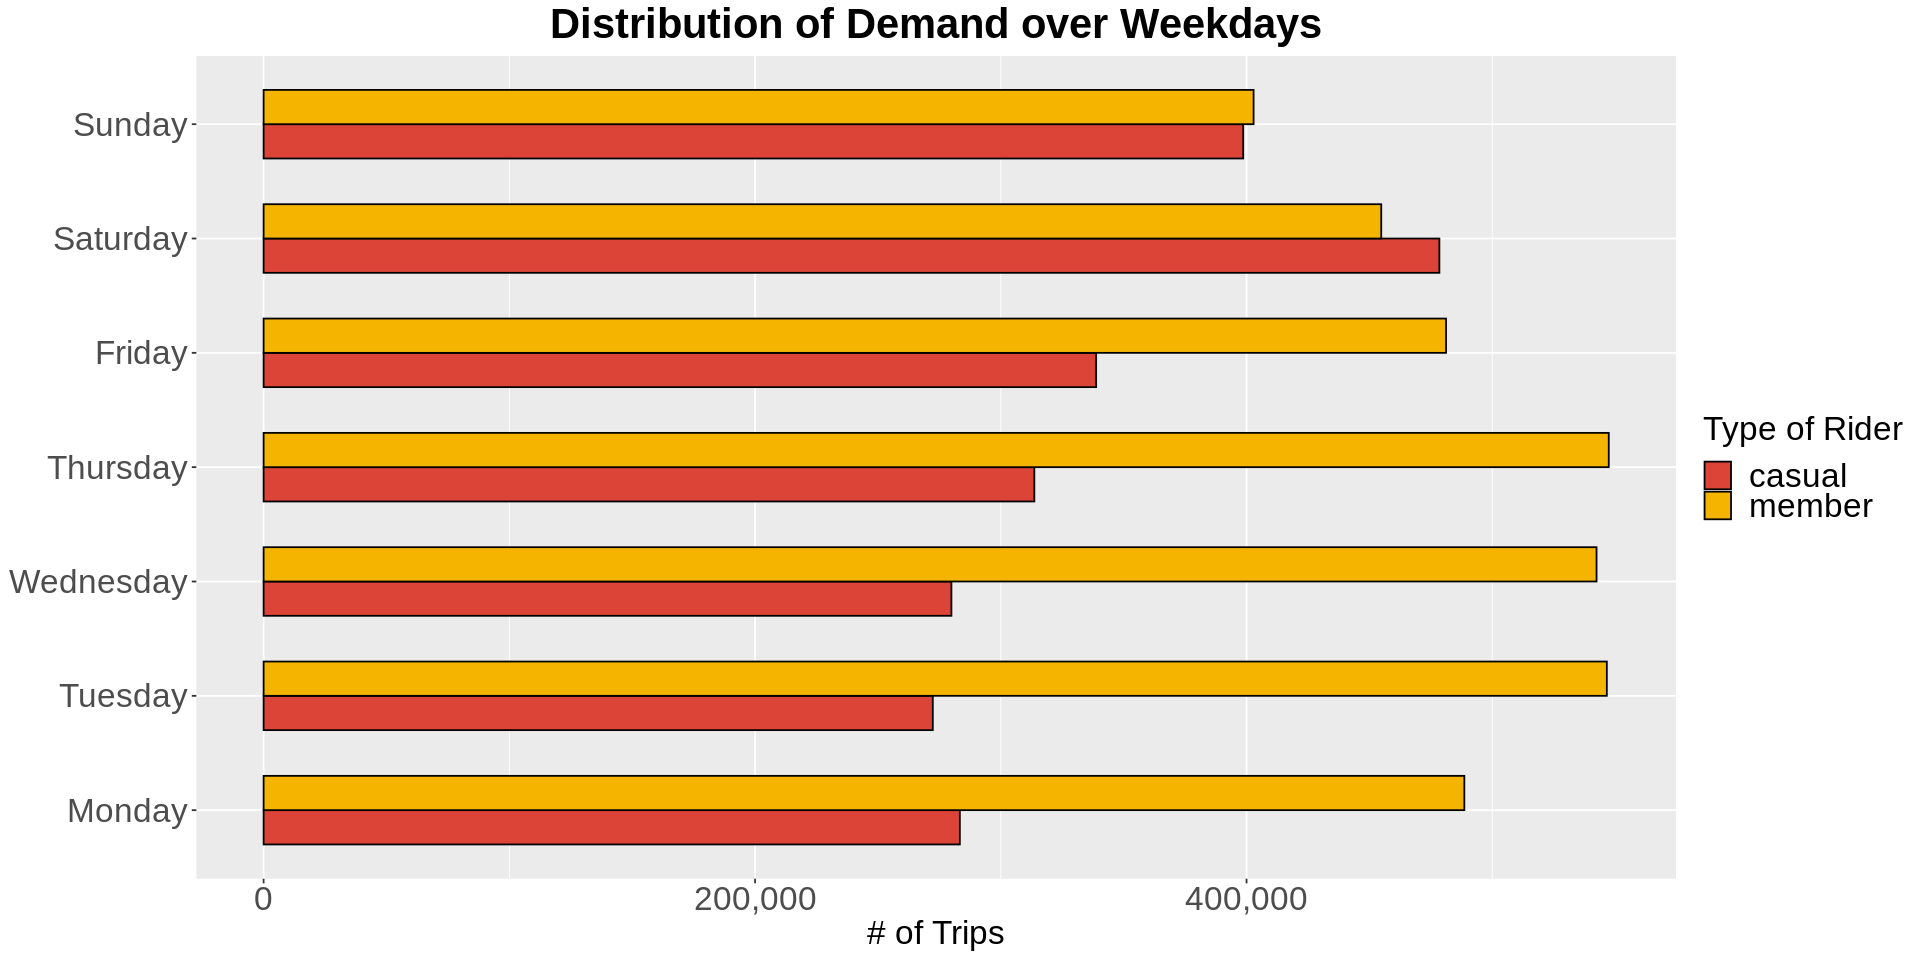

In [29]:
# Bar Chart to display which weekdays have high demand and which ones have low demand

# Define the order of days of the week
ordered_days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

# Reorder the levels of the 'day_of_week' variable
df_filtered$day_of_week <- factor(df_filtered$day_of_week, levels = ordered_days)

# Calculate the count of trips for each combination of user group and day of the week
temp <- df_filtered %>%
  group_by(member_casual, day_of_week) %>%
  summarise(.groups = 'drop', count = n())

# Plotting the bar chart
ggplot(temp, aes(fill = member_casual, x = count, y = day_of_week, width = 0.6)) +
  geom_col(position = 'dodge', color = 'black') +
  scale_fill_manual("Type of Rider", values = colors(1, 1, 0, 0)) +  # Assuming colors is a predefined function
  theme +  # Assuming theme is a predefined theme
  theme(axis.title.y = element_blank()) +  # Remove y-axis label
  ggtitle('Distribution of Demand over Weekdays') +
  scale_x_continuous(name = '# of Trips', labels = comma)  # Assuming comma is a predefined function


##### **4) Identify the most frequently used start and end stations by both user groups.**

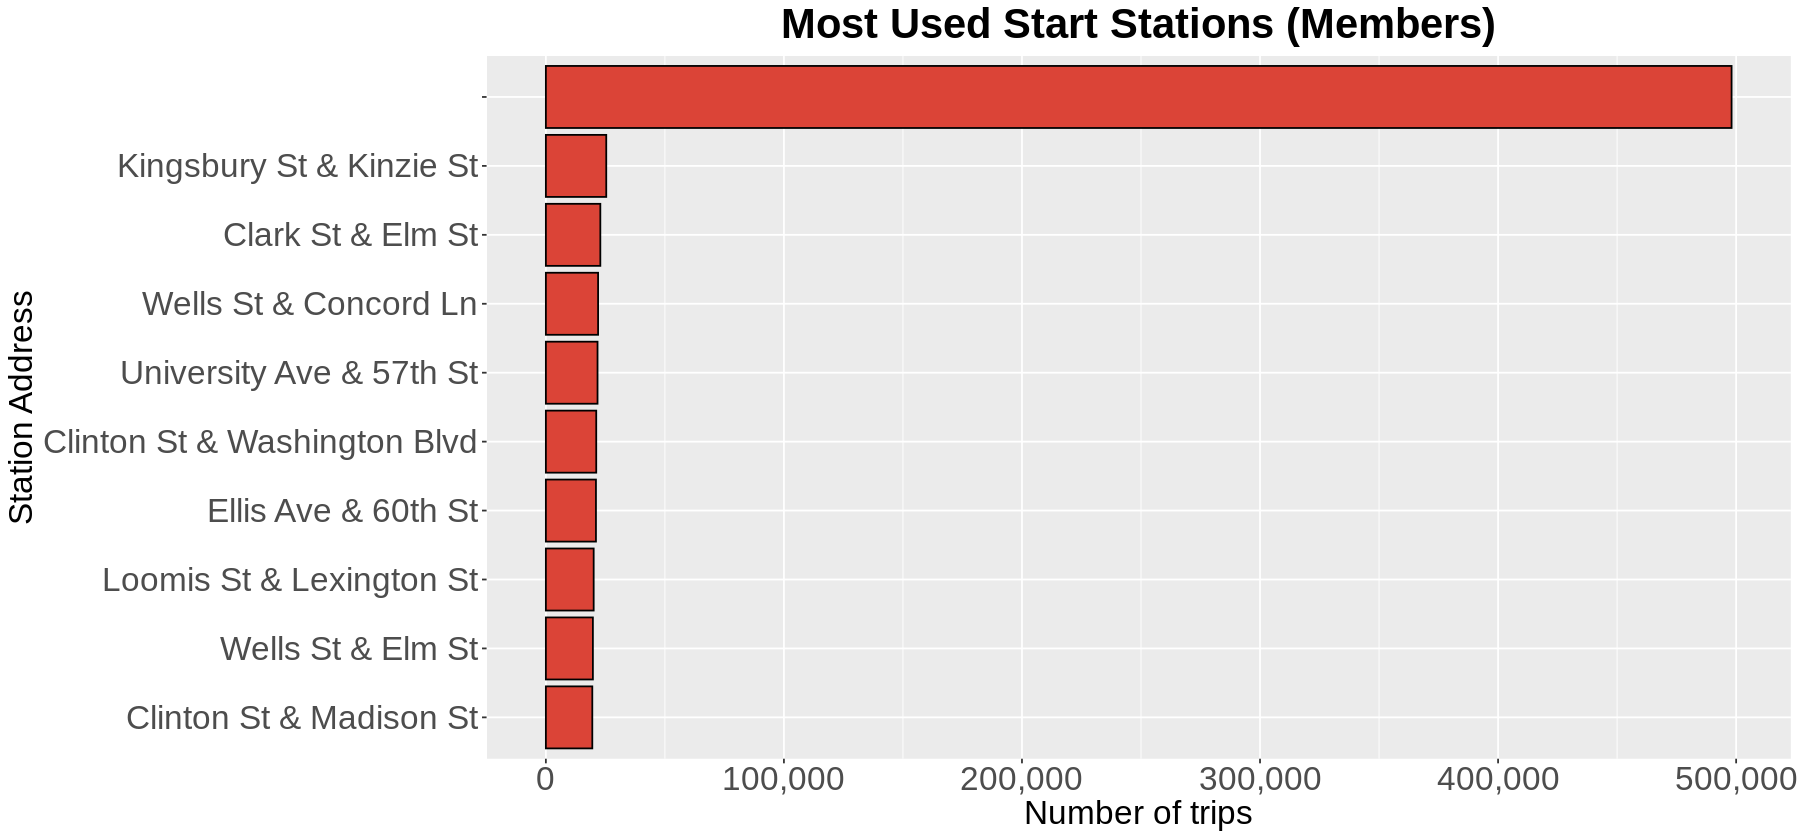

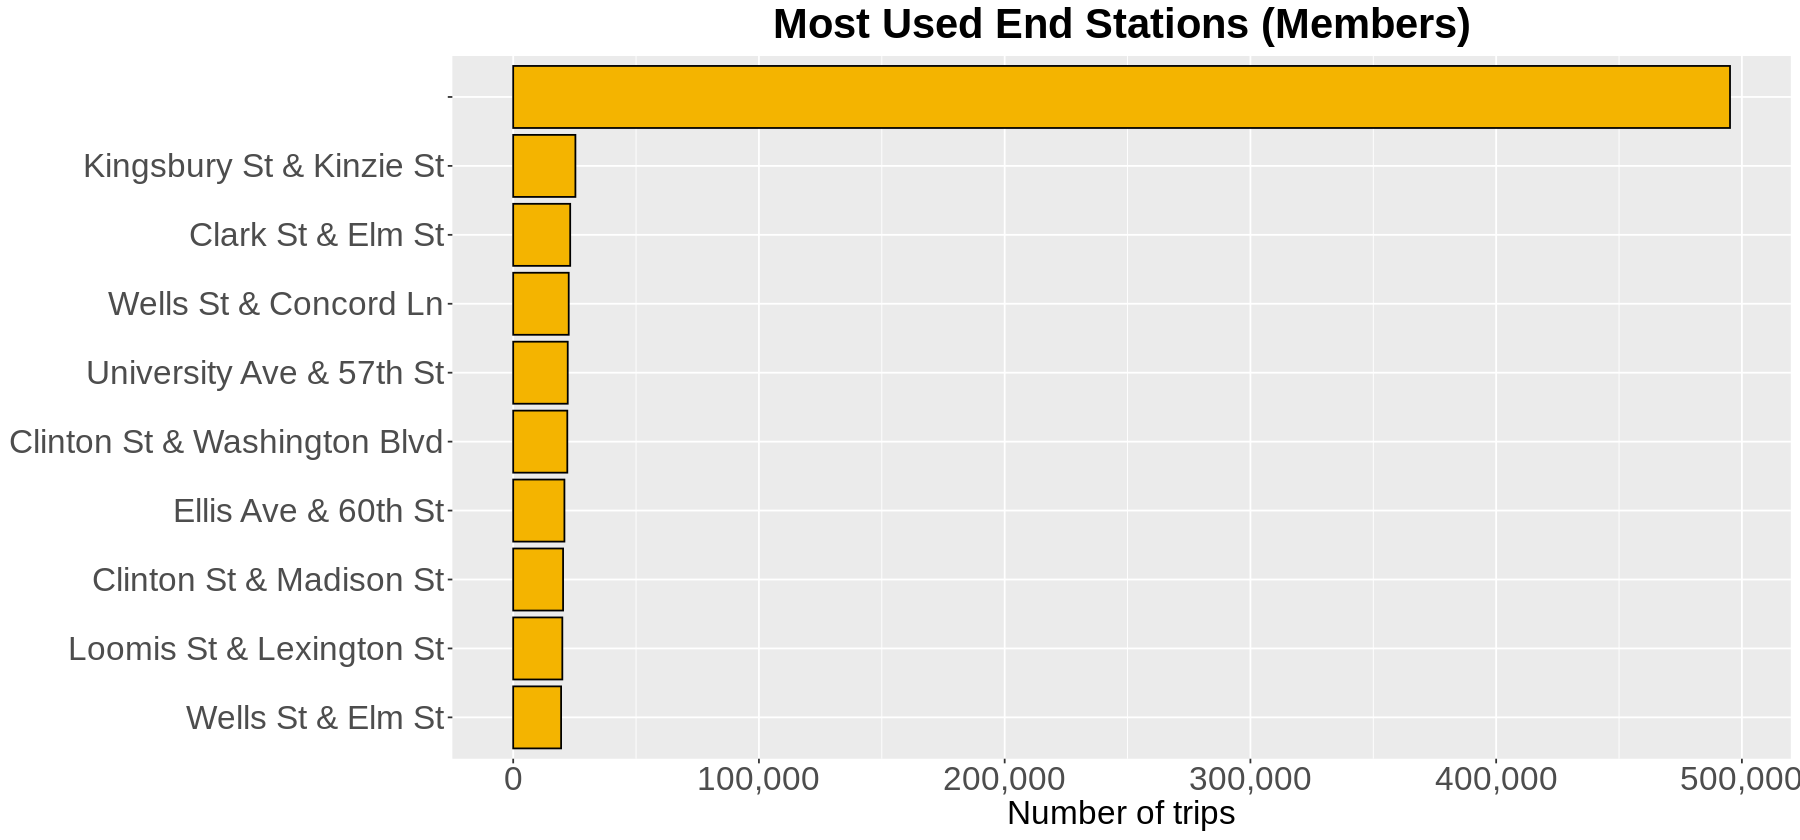

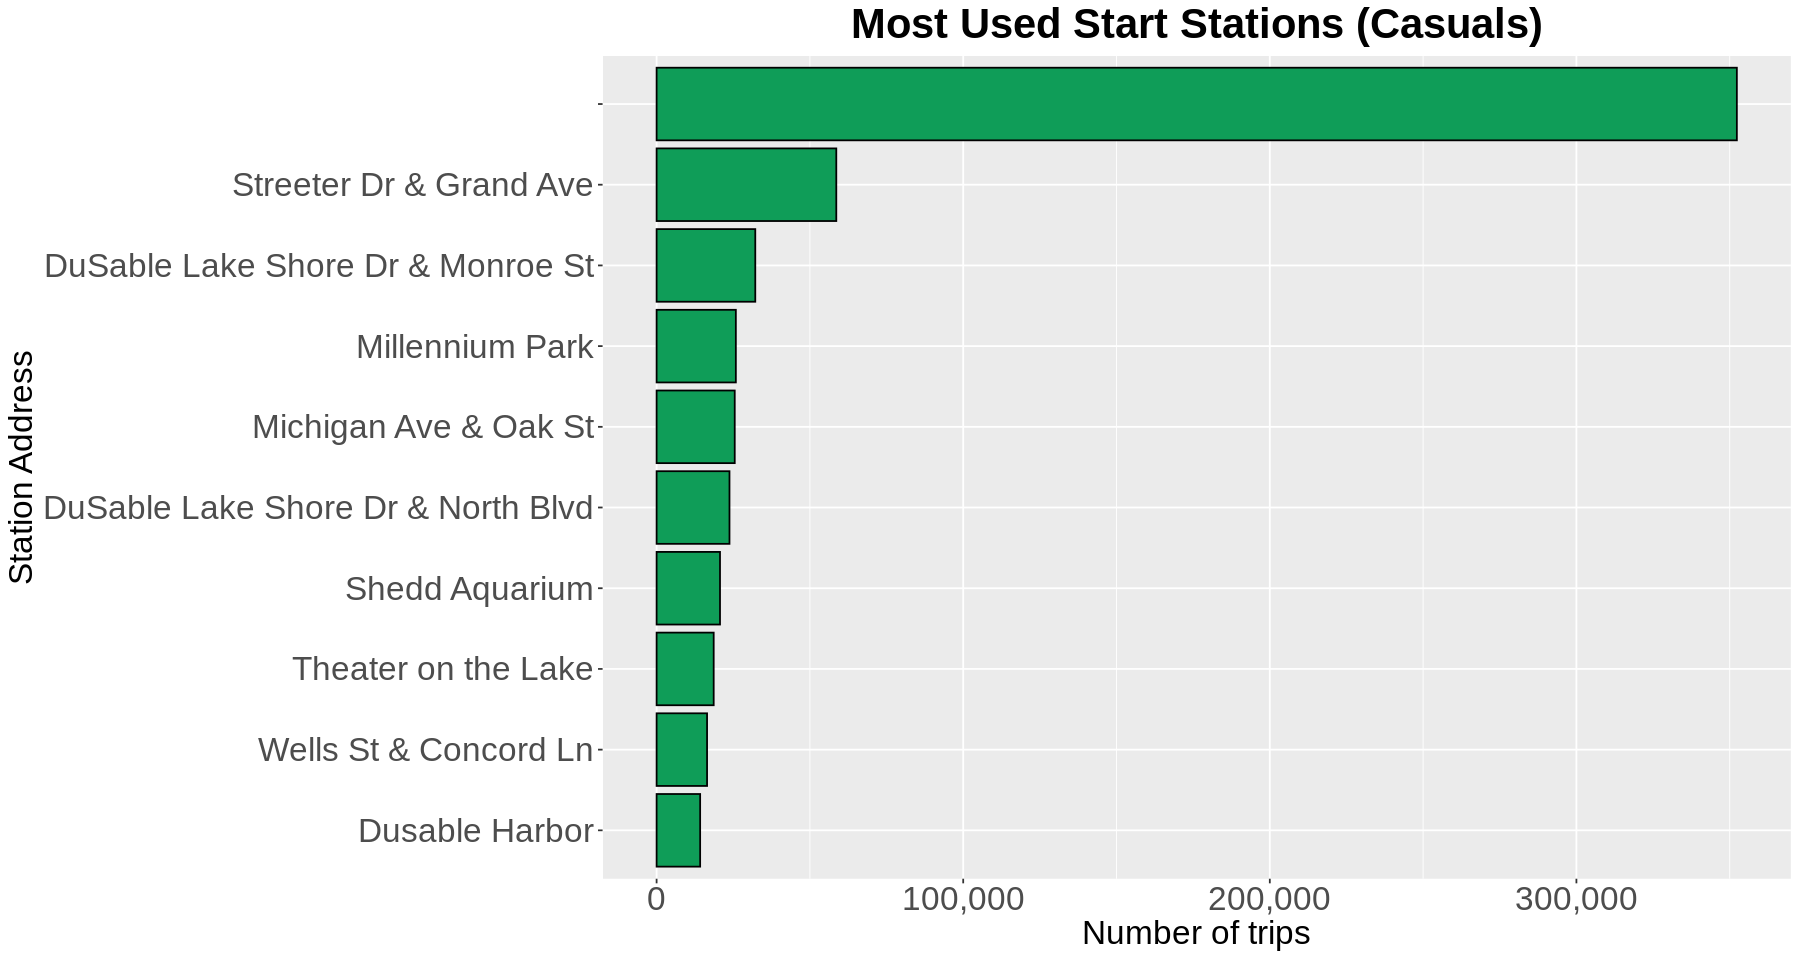

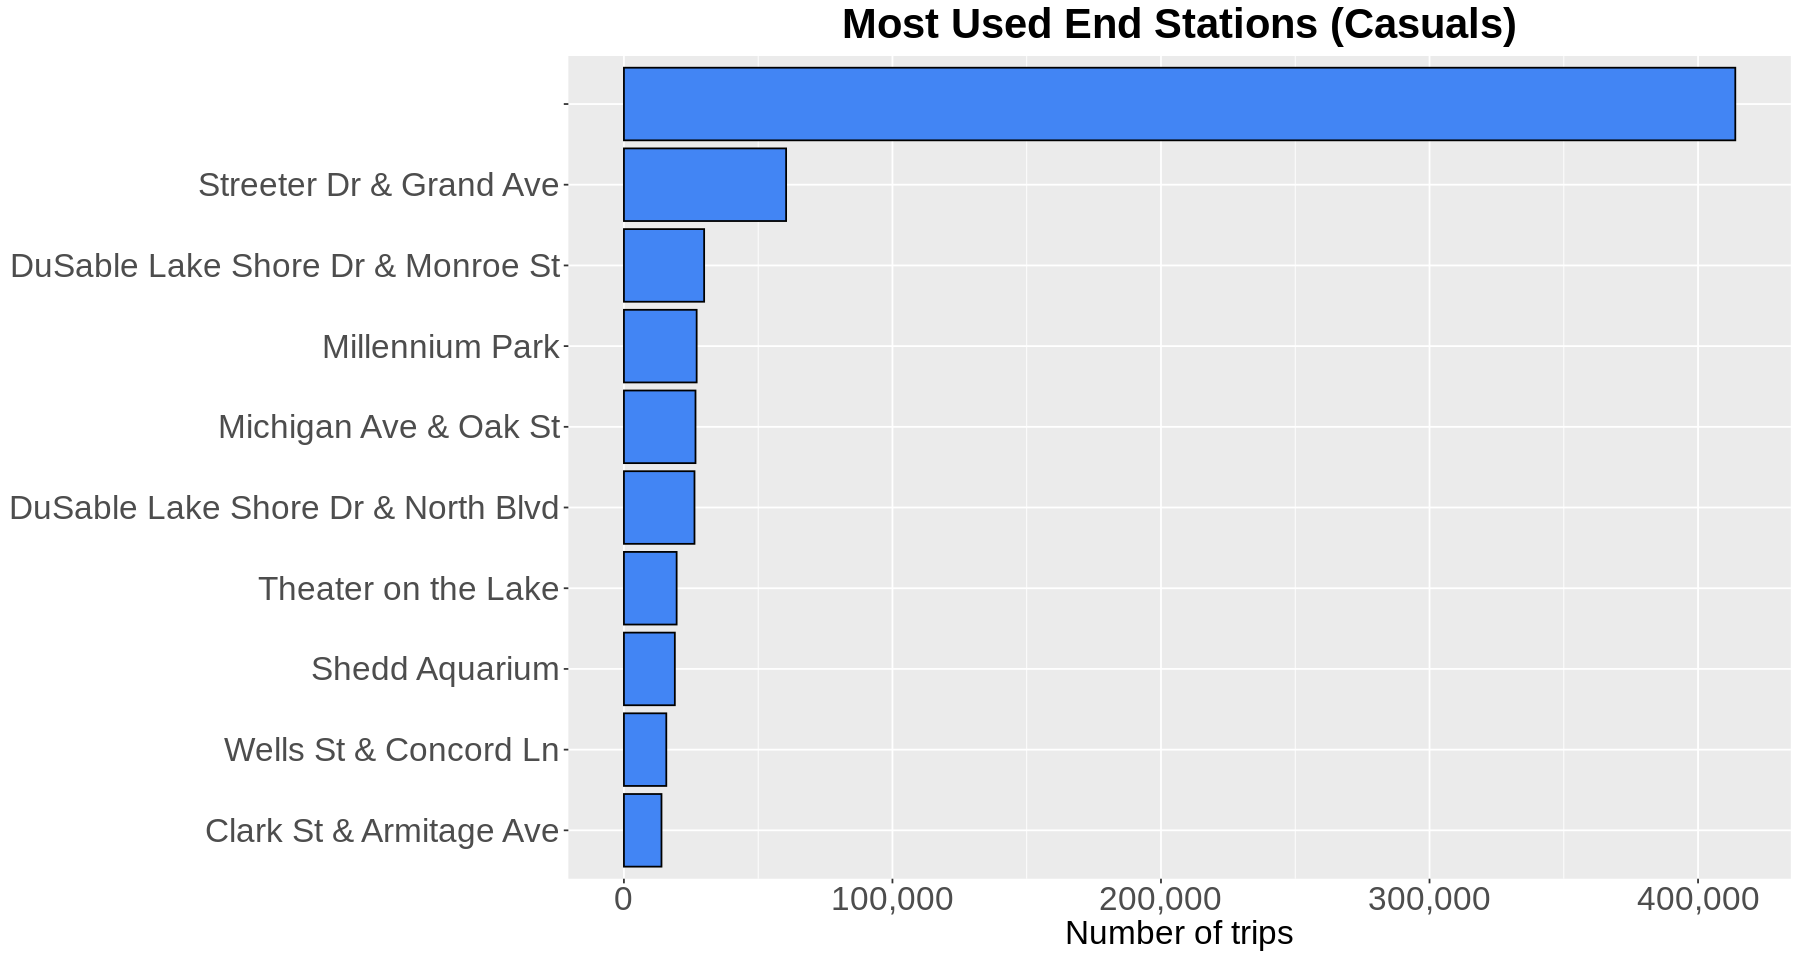

In [30]:
# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 7)

# Top 10 most used start stations by members
start1 <- df_filtered %>%
  filter(member_casual == 'member') %>%
  group_by(start_station_name) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  head(10)

# Top 10 most used end stations by members
end1 <- df_filtered %>%
  filter(member_casual == 'member') %>%
  group_by(end_station_name) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  head(10)

# Top 10 most used start stations by casual users
start2 <- df_filtered %>%
  filter(member_casual == 'casual') %>%
  group_by(start_station_name) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  head(10)

# Top 10 most used end stations by casual users
end2 <- df_filtered %>%
  filter(member_casual == 'casual') %>%
  group_by(end_station_name) %>%
  summarise(count = n()) %>%
  arrange(-count) %>%
  head(10)

# Bar Charts for Members' Start and End Stations
ggplot(start1, aes(x = count, y = reorder(start_station_name, count))) +
  geom_col(color = 'black', fill = colors(10, 0, 0, 0)) +
  theme +
  ggtitle('Most Used Start Stations (Members)') +
  scale_x_continuous(name = 'Number of trips', labels = comma) +
  ylab('Station Address')

ggplot(end1, aes(x = count, y = reorder(end_station_name, count))) +
  geom_col(color = 'black', fill = colors(0, 10, 0, 0)) +
  theme +
  ggtitle('Most Used End Stations (Members)') +
  scale_x_continuous(name = 'Number of trips', labels = comma) +
  theme(axis.title.y = element_blank())

# Set plot dimensions for Casuals' Start and End Stations
options(repr.plot.width = 15, repr.plot.height = 8)

# Bar Charts for Casuals' Start and End Stations
ggplot(start2, aes(x = count, y = reorder(start_station_name, count))) +
  geom_col(color = 'black', fill = colors(0, 0, 10, 0)) +
  theme +
  ggtitle('Most Used Start Stations (Casuals)') +
  scale_x_continuous(name = 'Number of trips', labels = comma) +
  ylab('Station Address')

ggplot(end2, aes(x = count, y = reorder(end_station_name, count))) +
  geom_col(color = 'black', fill = colors(0, 0, 0, 10)) +
  theme +
  ggtitle('Most Used End Stations (Casuals)') +
  scale_x_continuous(name = 'Number of trips', labels = comma) +
  theme(axis.title.y = element_blank())

##### **5) Conduct a five-number summary analysis of ride lengths to understand their distribution.**

[1] "Five number summary of ride length (Members)"

"Min.   :    0.00  " "1st Qu.:    5.05  " "Median :    8.73  " 
                                                               
"Mean   :   12.58  " "3rd Qu.:   15.12  " "Max.   :10353.35  "

[1] "Five number summary of ride length (Casuals)"

"Min.   :    0.00  " "1st Qu.:    7.23  " "Median :   12.83  " 
                                                               
"Mean   :   28.94  " "3rd Qu.:   23.87  " "Max.   :41387.25  "

Warning message:
“Removed 289529 rows containing non-finite values (`stat_boxplot()`).”


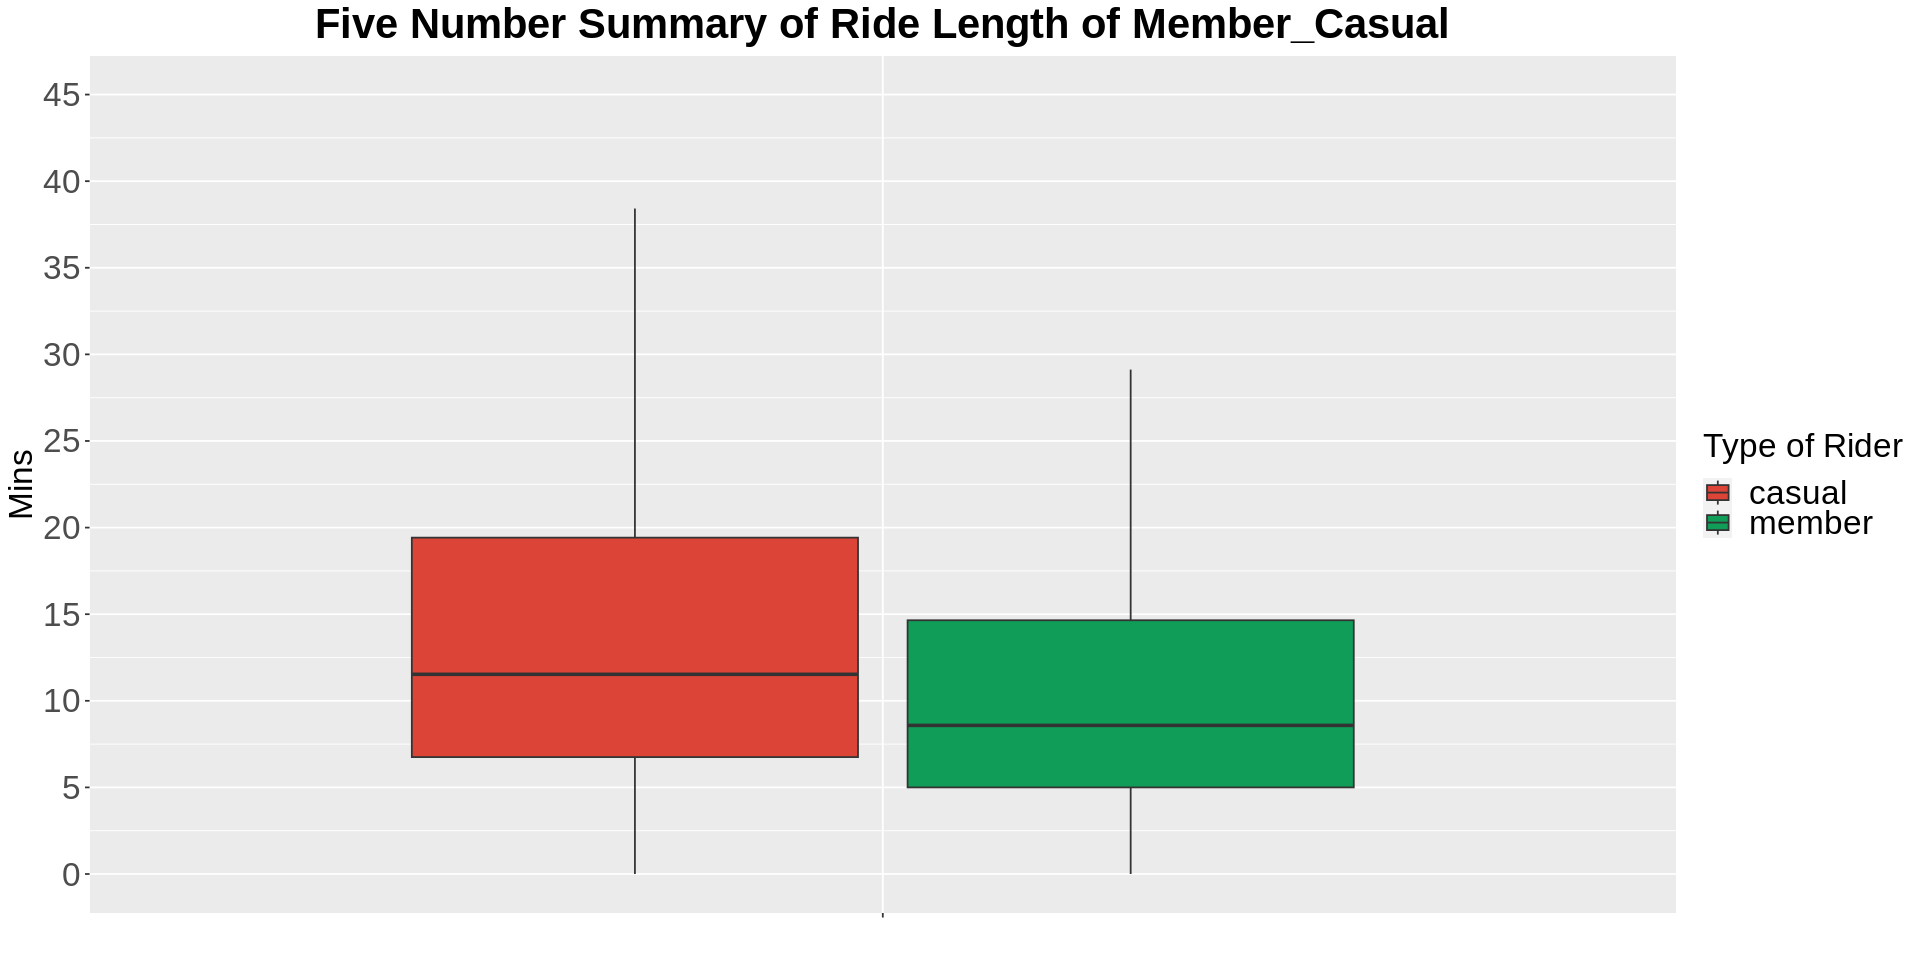

In [31]:
# Set plot dimensions
options(repr.plot.width = 16, repr.plot.height = 8)

# Display five number summary of ride length for members
paste('Five number summary of ride length (Members)')
summary(df_filtered %>% filter(member_casual == 'member'))[1:6, 'ride_length_mins']

# Display five number summary of ride length for casuals
paste('Five number summary of ride length (Casuals)')
summary(df_filtered %>% filter(member_casual == 'casual'))[1:6, 'ride_length_mins']

# Boxplots
ggplot(df_filtered, aes(y = ride_length_mins, x = '', fill = member_casual)) +
  geom_boxplot(outlier.shape = NA) +
  scale_y_continuous(name = 'Mins', breaks = seq(0, 45, 5), limits = c(0, 45)) +
  theme +
  theme(axis.title.x = element_blank()) +
  ggtitle('Five Number Summary of Ride Length of Member_Casual') +
  scale_fill_manual("Type of Rider", values = colors(1, 0, 1, 0))  # Assuming colors is a predefined function

##### **6) Examine the fluctuation in demand across different months to identify peak and off-peak periods.**

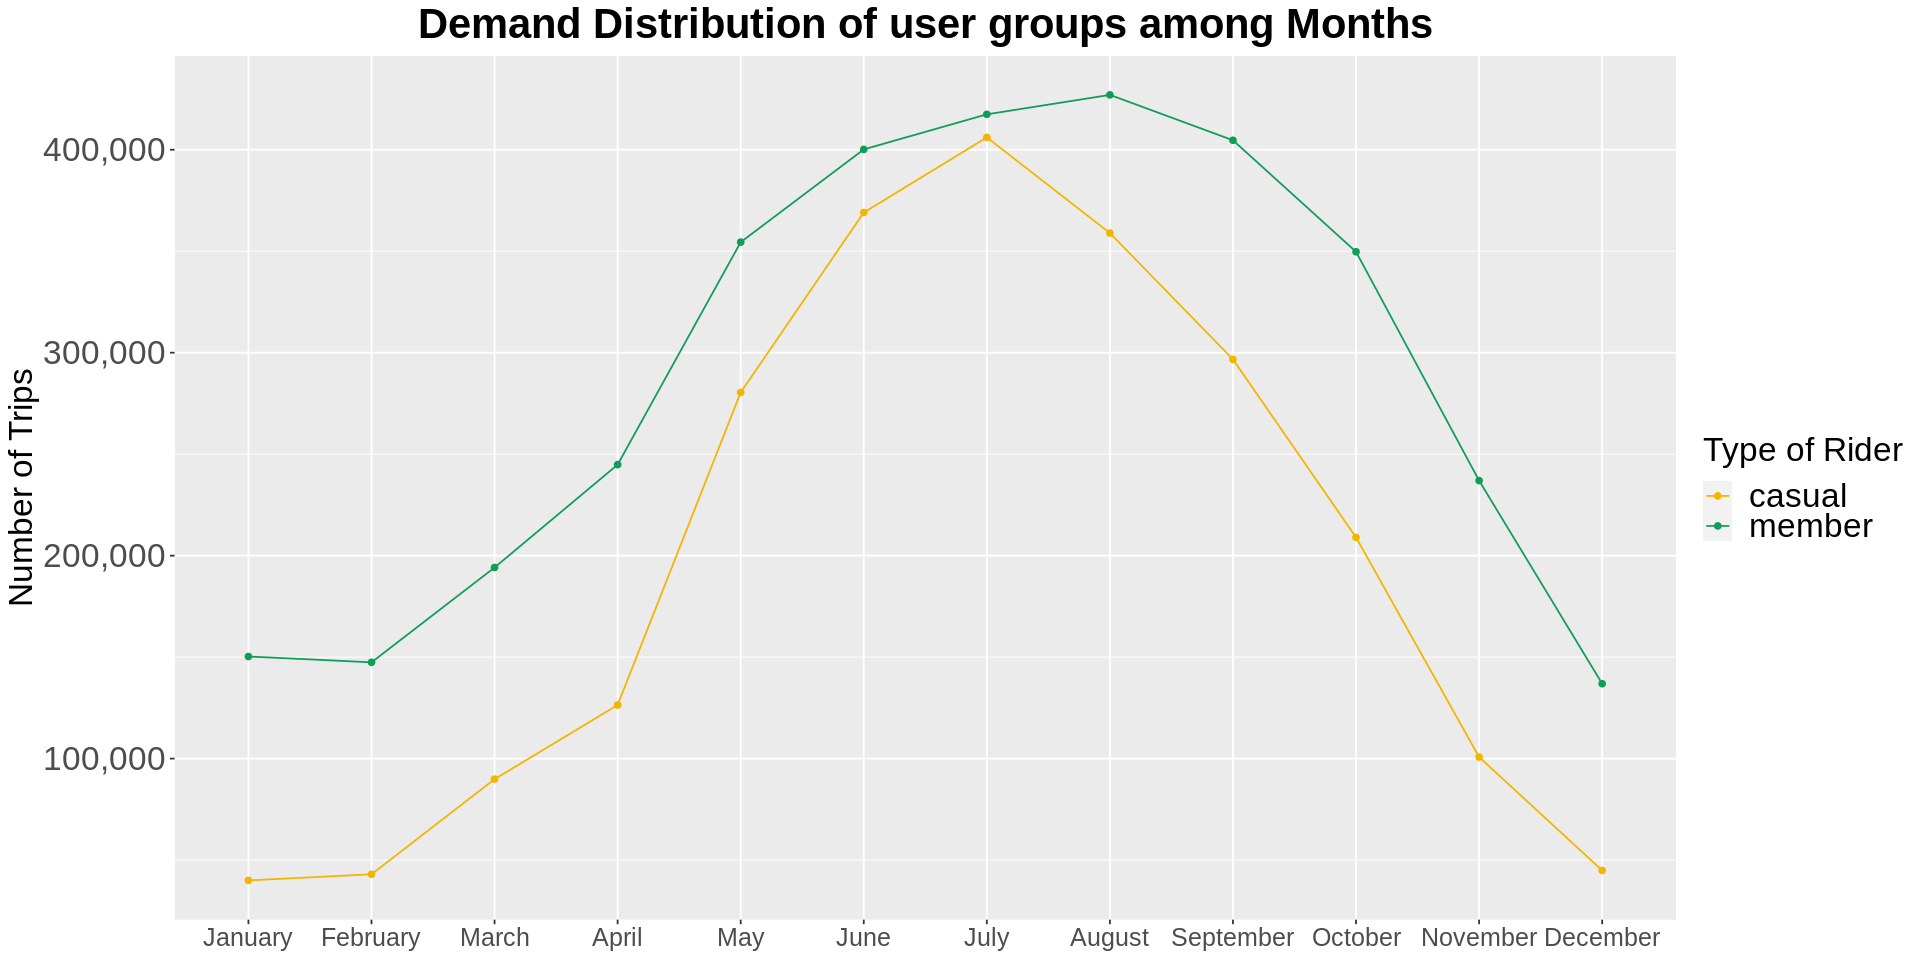

In [32]:
# Find out which months have high demand and which ones have low demand

# Line Chart with Points

# Calculate the count of trips for each combination of user group and month
temp <- df_filtered %>%
  group_by(member_casual, month) %>%
  summarise(.groups = 'drop', count = n())

# Plotting the line chart with points
ggplot(temp, aes(group = member_casual, x = month, y = count)) +
  geom_line(aes(color = member_casual)) +
  geom_point(aes(color = member_casual)) +
  theme +
  theme(axis.text.x = element_text(size = 15), axis.title.x = element_blank()) +
  scale_y_continuous(name = 'Number of Trips', labels = comma) +
  scale_color_manual('Type of Rider', values = colors(0, 1, 1, 0)) +  # Assuming colors is a predefined function
  ggtitle('Demand Distribution of user groups among Months')

##### **7) Analyze the variation in demand throughout the day to identify peak and off-peak hours.**

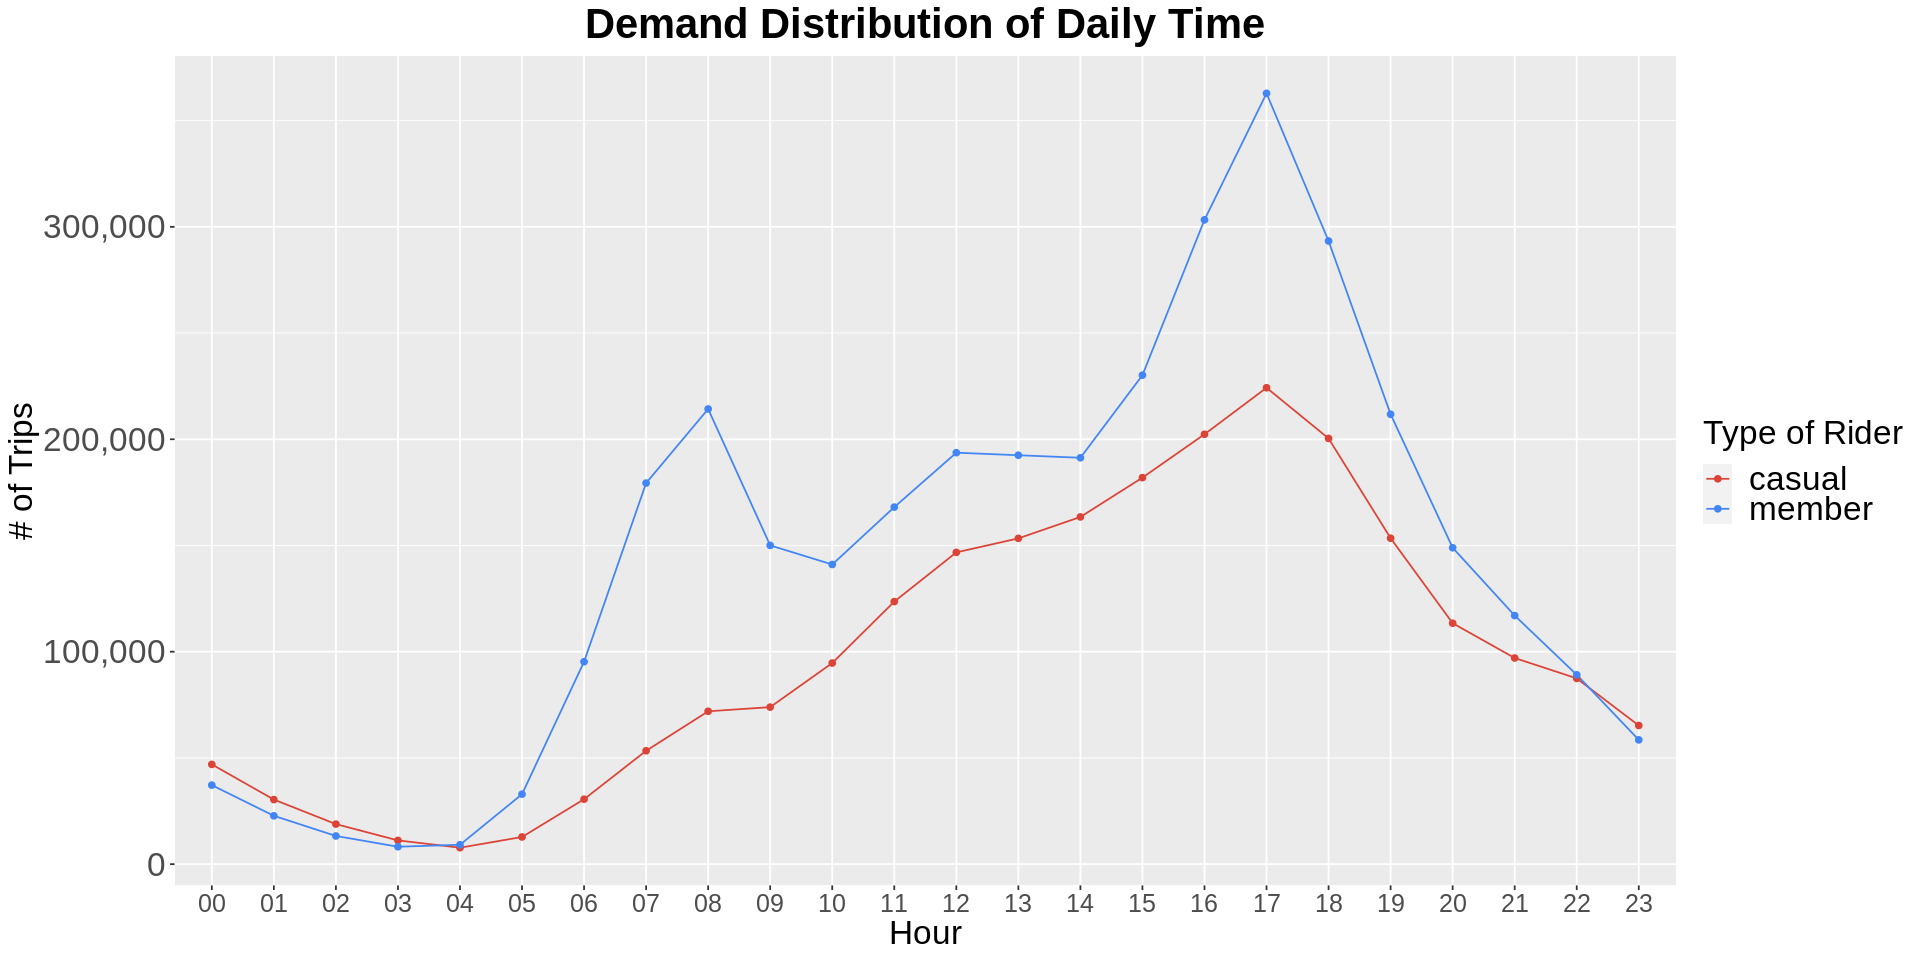

In [33]:
# Find out which daily times have high demand and which ones have low demand

# Calculate the count of trips for each combination of user group and time
temp <- df_filtered %>%
  group_by(member_casual, time) %>%
  summarise(.groups = 'drop', count = n())

# Plotting the line chart with points
ggplot(temp, aes(group = member_casual, x = time, y = count)) +
  geom_line(aes(color = member_casual)) +
  geom_point(aes(color = member_casual)) +
  theme +
  theme(axis.text.x = element_text(size = 15)) +
  xlab('Hour') +  # Label for x-axis
  scale_y_continuous(name = '# of Trips', labels = comma) +
  scale_color_manual('Type of Rider', values = colors(1, 0, 0, 1)) +  # Assuming colors is a predefined function
  ggtitle('Demand Distribution of Daily Time')  # Title of the plot

## **VI. Phase 5 - SHARE**

`After completing my analysis and extracting insights from the data, I will craft visual representations to communicate my discoveries effectively to stakeholders.`

In [34]:
# Export the prepared data to use it in tableau for creating a dashboard
# write.csv(df_filtered, 'cleaned_data.csv')

## **VII. Phase 6 - ACT(Recommendations)**

`Based on what we found out, here are some suggestions:`

* `Give discounts or special deals to casual riders to convince them to become annual members.`
* `Make ads and promotions that suit how casual riders and annual members use the bikes differently.`
* `Put more bikes in places where lots of people commute to get more annual members.`

## **VIII. Conclustion**


In summary, this project delivers compelling data insights and visualizations, laying a strong foundation for Cyclistic's revamped marketing strategy. With a deeper understanding of the distinctions between casual riders and annual members, Cyclistic is poised to optimize its marketing endeavors, ultimately driving an uptick in annual memberships.